# Explore here

In [1]:
!pip install tableone > null

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne
from scipy.stats import shapiro

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df_tr = df.copy()
df_tr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
df_tr.drop(['id', 'host_name', 'name', 'host_id', 'last_review'], axis=1, inplace=True)

In [7]:
def binary(data):
  bin_reg = bin_reg = r"^[01](?:\.0)?\.?$"
  if str(data) == 'nan':
    return np.nan
  else:
    return bool(re.findall(bin_reg, str(data)))

In [8]:
def is_binary(df_, col):
  """
  to consider this as a pure binary var take into account that
  the others not reach a limit of range..
  #no puedehaber un porcentaje de varriable superior con más de un  digito!!!!!!
  """
  df = df_.copy()
  percent =  df[col].apply(binary).sum() / df[col].count()
  if percent > 0.5:
    return True
  else:
    return False

In [9]:
def tipo_dato(df):
  categoricas = []
  nonormales = []
  normales = []

  for col in df.columns:
    if df[col].dtypes.name=='int64' or df[col].dtypes.name == 'float64':
      if is_binary(df, col):
        categoricas.append(col)
      else:
        if shapiro(df[col]).pvalue > 0.05:
          normales.append(col)
        else:
          nonormales.append(col)
    else:
      categoricas.append(col)
  return categoricas, normales, nonormales

In [10]:
tipos = tipo_dato(df_tr)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
tipos

(['neighbourhood_group',
  'neighbourhood',
  'room_type',
  'calculated_host_listings_count'],
 [],
 ['latitude',
  'longitude',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'availability_365'])

In [12]:
to_drop = []
for var in tipos[1]:
  if len(df[var].unique()) > 7:
    to_drop.append(var)


In [13]:
df_tr.drop(to_drop, axis=1, inplace=True)

In [14]:
import math

In [15]:
def distancia_haversine(lat1, lon1, lat2, lon2):
    r = 6371  # Radio de la Tierra en km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return r * c

central_lat =  40.785091
central_lon = -73.968285

df_tr['central_park'] = df.apply(
    lambda row: distancia_haversine(
        central_lat, central_lon,
        row['latitude'], row['longitude']
    ),
    axis=1
)


time_lat =  40.7580
time_lon = -73.9855

df_tr['time_square'] = df.apply(
    lambda row: distancia_haversine(
        time_lat, time_lon,
        row['latitude'], row['longitude']
    ),
    axis=1
)

estatua_lat =  40.6892
estatua_lon = -74.0445

df_tr['estatua_libertad'] = df.apply(
    lambda row: distancia_haversine(
        estatua_lat, estatua_lon,
        row['latitude'], row['longitude']
    ),
    axis=1
)

broadway_lat =  40.7590
broadway_lon = -73.9845

df_tr['broadway'] = df.apply(
    lambda row: distancia_haversine(
        broadway_lat, broadway_lon,
        row['latitude'], row['longitude']
    ),
    axis=1
)

In [16]:
df_tr.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [17]:
df_tr.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,central_park,time_square,estatua_libertad,broadway
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,15.304406,12.337898,7.649799,12.441436
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,3.734490,0.508366,8.803656,0.601380
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365,3.465940,6.757240,15.881167,6.618139
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,11.137231,8.387034,7.159264,8.473362
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,2.531704,5.701496,14.813350,5.562011


In [18]:
df_tr.drop(['neighbourhood', 'calculated_host_listings_count'], axis=1, inplace=True)

In [19]:
categorical = tipo_dato(df_tr)[0]
categorical

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)


['neighbourhood_group', 'room_type']

In [20]:
nonnormal = tipo_dato(df_tr)[2]
nonnormal

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)


['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365',
 'central_park',
 'time_square',
 'estatua_libertad',
 'broadway']

In [23]:
normal = tipo_dato(df_tr)[1]
normal

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)


[]

In [22]:
TableOne(df_tr,
         categorical=categorical,
         nonnormal= nonnormal,
         groupby='neighbourhood_group',
         pval=True,
         missing=False
         )

Grouped by neighbourhood_group                                                                                                          
                                                                         Overall               Bronx           Brooklyn           Manhattan             Queens       Staten Island P-Value
n                                                                          48895                1091              20104               21661               5666                 373        
neighbourhood_group, n (%)        Bronx                               1091 (2.2)        1091 (100.0)            0 (0.0)             0 (0.0)            0 (0.0)             0 (0.0)  <0.001
                                  Brooklyn                          20104 (41.1)             0 (0.0)      20104 (100.0)             0 (0.0)            0 (0.0)             0 (0.0)        
                                  Manhattan                         21661 (44.3)             0 (0.0)            0 (0.0)       21661 (100.0)            0 (0.0)             0 (0.0)        
                                  Queens                             5666 (11.6)             0 (0.0)            0 (0.0)             0 (0.0)       5666 (100.0)             0 (0.0)        
                                  Staten Island                        373 (0.8)             0 (0.0)            0 (0.0)             0 (0.0)            0 (0.0)         373 (100.0)        
room_type, n (%)                  Entire home/apt                   25409 (52.0)          379 (34.7)        9559 (47.5)        13199 (60.9)        2096 (37.0)          176 (47.2)  <0.001
                                  Private room                      22326 (45.7)          652 (59.8)       10132 (50.4)         7982 (36.8)        3372 (59.5)          188 (50.4)        
                                  Shared room                         1160 (2.4)            60 (5.5)          413 (2.1)           480 (2.2)          198 (3.5)             9 (2.4)        
price, median [Q1,Q3]                                         106.0 [69.0,175.0]    65.0 [45.0,99.0]  90.0 [60.0,150.0]  150.0 [95.0,220.0]  75.0 [50.0,110.0]   75.0 [50.0,110.0]  <0.001
minimum_nights, median [Q1,Q3]                                     3.0 [1.0,5.0]       2.0 [1.0,3.0]      3.0 [2.0,5.0]       3.0 [1.0,6.0]      2.0 [1.0,3.0]       2.0 [1.0,3.0]  <0.001
number_of_reviews, median [Q1,Q3]                                 5.0 [1.0,24.0]      9.0 [1.0,32.0]     6.0 [1.0,25.0]      4.0 [1.0,19.0]     7.0 [1.0,32.0]     12.0 [1.0,42.0]  <0.001
reviews_per_month, median [Q1,Q3]                                  0.7 [0.2,2.0]       1.4 [0.5,2.8]      0.7 [0.2,2.0]       0.6 [0.2,1.9]      1.2 [0.4,2.8]       1.4 [0.7,2.6]  <0.001
availability_365, median [Q1,Q3]                                45.0 [0.0,227.0]  148.0 [37.0,313.5]   28.0 [0.0,188.0]    36.0 [0.0,230.0]   98.0 [2.0,286.0]  219.0 [78.0,333.0]  <0.001
central_park, median [Q1,Q3]                                      7.8 [4.6,11.4]     10.5 [7.2,12.8]    11.2 [9.4,12.8]       4.3 [2.6,6.6]     8.9 [5.2,13.6]    21.7 [19.5,24.1]  <0.001
time_square, median [Q1,Q3]                                        6.4 [3.8,9.4]    13.7 [10.3,15.9]     8.6 [7.0,10.3]       3.6 [1.9,5.5]     8.8 [5.9,13.9]    18.5 [16.2,20.8]  <0.001
estatua_libertad, median [Q1,Q3]                                  9.3 [7.4,12.9]    22.7 [19.3,24.9]      8.5 [7.4,9.6]      9.4 [6.7,14.0]   14.6 [12.8,19.3]      9.5 [7.1,11.9]  <0.001
broadway, median [Q1,Q3]                                           6.4 [3.8,9.5]    13.5 [10.2,15.8]     8.7 [7.1,10.4]       3.6 [2.0,5.4]     8.8 [5.8,13.9]    18.6 [16.3,20.9]  <0.001

In [24]:
df_tr[nonnormal + normal].corr(method='spearman')

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,central_park,time_square,estatua_libertad,broadway
price,1.000000,0.101289,-0.055009,-0.018527,0.086088,-0.304241,-0.457088,-0.298996,-0.452959
minimum_nights,0.101289,1.000000,-0.174905,-0.288797,0.075981,-0.093215,-0.128779,-0.100298,-0.127853
number_of_reviews,-0.055009,-0.174905,1.000000,0.706208,0.236664,0.082279,0.107917,0.044606,0.107528
reviews_per_month,-0.018527,-0.288797,0.706208,1.000000,0.392126,0.087496,0.115240,0.113945,0.114360
availability_365,0.086088,0.075981,0.236664,0.392126,1.000000,0.060818,0.073963,0.108404,0.072988
central_park,-0.304241,-0.093215,0.082279,0.087496,0.060818,1.000000,0.835476,-0.188851,0.848517
time_square,-0.457088,-0.128779,0.107917,0.115240,0.073963,0.835476,1.000000,0.278088,0.999634
estatua_libertad,-0.298996,-0.100298,0.044606,0.113945,0.108404,-0.188851,0.278088,1.000000,0.256259
broadway,-0.452959,-0.127853,0.107528,0.114360,0.072988,0.848517,0.999634,0.256259,1.000000


<Axes: >

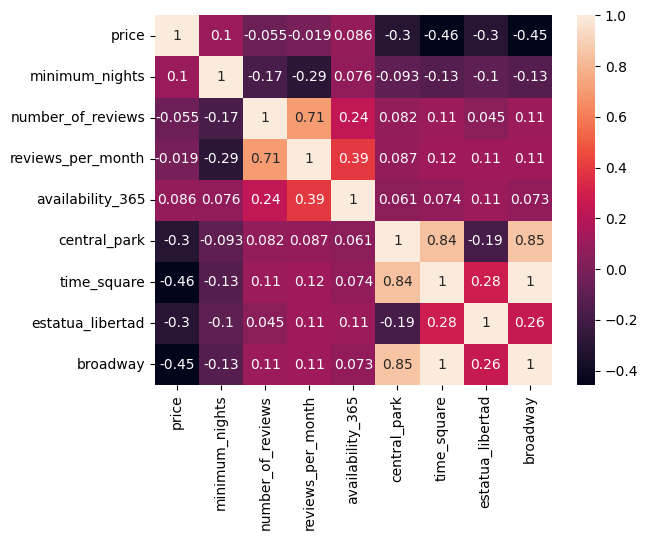

In [25]:
sns.heatmap(df_tr[nonnormal + normal].corr(method='spearman'), annot=True)